<a href="https://colab.research.google.com/github/teja82/Assignments/blob/main/17_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
df.shape

(16000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


<Axes: xlabel='label', ylabel='count'>

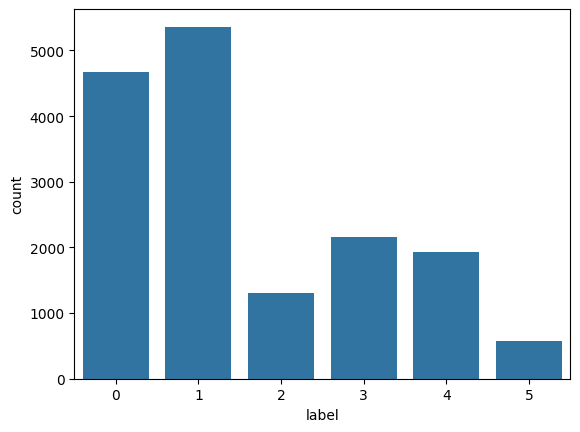

In [6]:
import seaborn as sns
sns.countplot(x=df.label)

In [8]:
df.isna().sum()

,0
text,0
label,0


In [9]:
df['text']=df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']= df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [16]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']= df['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

,text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['text'])
x=x.toarray()
y=df.label.values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, shuffle=True)

In [21]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,pred)*100,"%")

Accuracy: 35.0 %


In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test).astype(int)

In [27]:
print('Accuracy:',accuracy_score(y_test,rf_pred)*100,'%')

Accuracy: 88.53125 %


In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[876  27   6  22  12   3]
 [ 28 953  26   5   8   1]
 [  4  71 213   5   3   0]
 [ 21  25   3 367  10   1]
 [ 15  15   1  14 342  10]
 [  3   7   1   0  20  82]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.87      0.93      0.90      1021
           2       0.85      0.72      0.78       296
           3       0.89      0.86      0.87       427
           4       0.87      0.86      0.86       397
           5       0.85      0.73      0.78       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.89      0.89      0.88      3200



In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [31]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[845  29  12  32  22   6]
 [ 20 910  70   6   6   9]
 [  0  19 268   3   4   2]
 [ 12  11   3 385  13   3]
 [ 13  12   2  17 328  25]
 [  3   1   0   0  12  97]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       946
           1       0.93      0.89      0.91      1021
           2       0.75      0.91      0.82       296
           3       0.87      0.90      0.89       427
           4       0.85      0.83      0.84       397
           5       0.68      0.86      0.76       113

    accuracy                           0.89      3200
   macro avg       0.84      0.88      0.86      3200
weighted avg       0.89      0.89      0.89      3200

